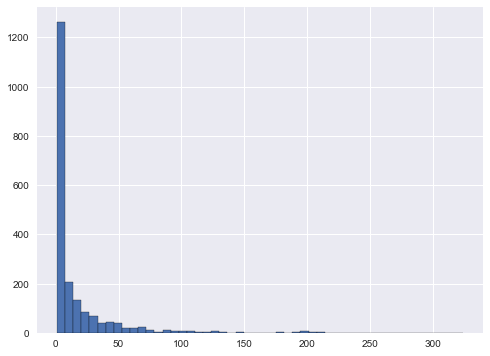

In [2]:
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

def parse_genres(genres_str):
    genres = json.loads(genres_str.replace('\'', '"'))
    
    genres_list = []
    for g in genres:
        genres_list.append(g['name'])

    return '|'.join(genres_list)

ratings = pd.read_csv('/Users/whitexozu/dev/project/recommend/data/the-movies-dataset/ratings_small.csv')
ratings.head()

meta = pd.read_csv('/Users/whitexozu/dev/project/recommend/data/the-movies-dataset/movies_metadata.csv', dtype={'popularity': str})
# meta.head()

meta = meta[['id', 'original_title', 'original_language', 'genres']]
meta = meta.rename(columns={'id':'movieId'})
meta = meta.rename(columns={'original_title':'title'})
meta = meta[meta['original_language'] == 'en']

meta.movieId = pd.to_numeric(meta.movieId, errors='coerce')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce')

meta['genres'] = meta['genres'].apply(parse_genres)

data = pd.merge(ratings, meta, on='movieId', how='inner')

# print( data.head() )

# print( data.groupby('title')['rating'].mean().head() )

# print( data.groupby('title')['rating'].mean().sort_values(ascending=False).head() )

# print( data.groupby('title')['rating'].count().sort_values(ascending=False).head() )

ratings_mean_count = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(data.groupby('title')['rating'].count())
# print( ratings_mean_count.head() )

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

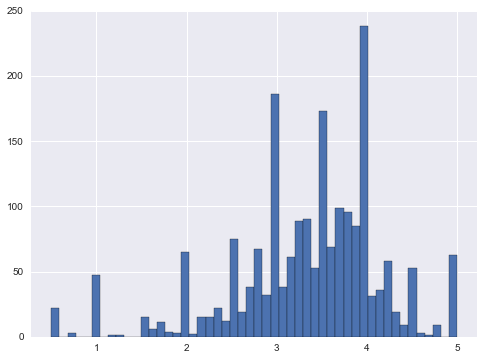

In [3]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

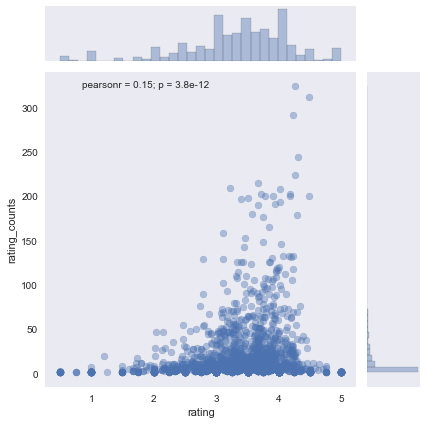

In [4]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)